# Logistic Regression For Cancer Classification (WBCD)
## Load Required Libraries

In [2]:
import pandas as pd # data manipulation for analysis - handling datasets
import numpy as np # package for scientific computing(numerical operations) - especially when working with arrays
import matplotlib # visualisation, plots and figures
import matplotlib.pyplot as plt # specifically for creating plots
import seaborn as sns # helps visualise statistical data(advanced)
import sklearn # library for machine learning
import scipy # scientific computing and stat functions

# prints version to make sure they are compatible
print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", sns.__version__)
print("Scikit-learn:", sklearn.__version__)
print("SciPy:", scipy.__version__)

Pandas: 2.2.2
NumPy: 1.26.4
Matplotlib: 3.9.2
Seaborn: 0.13.2
Scikit-learn: 1.5.1
SciPy: 1.13.1


# Scikit-Learn Specific Libraries 

In [4]:
# regression models
from sklearn import linear_model # describes relationships between variables
from sklearn.linear_model import LogisticRegression  # statistical model for binary classification - predicts outcome probability using sigmoid function
from sklearn.linear_model import LinearRegression  # straigth line relationship between target and features (for continuous target variables)
from sklearn.datasets import make_regression  # synthetic regression data - might be good when exploring overfitting
from sklearn.datasets import make_classification
from sklearn.datasets import load_breast_cancer

# preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder  #to scale and encode features(X) - labele ncoder allows M|B to be converted to binary numbers 0|1
from sklearn.compose import ColumnTransformer  # scaling and encoding different columns at the same time - diff preprocessing to diff columns
from sklearn.impute import SimpleImputer  # nan values filled in using mean|median etc... - no missing values in my dataset so not really necessar6y


# splitting data
from sklearn.model_selection import train_test_split # data split into training and testing sets


# pipeline
from sklearn.pipeline import Pipeline  

# Model Evaluation Metrics
from sklearn.metrics import accuracy_score  # classification accuracy = correct predicts/total predicts
from sklearn.metrics import mean_squared_error  # not useful for classification so not necessary
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, RocCurveDisplay  


# k-Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier  # k-NN classifier

# Ensemble Learning Models
from sklearn.ensemble import (
    AdaBoostClassifier,  # Adaptive boosting classifier
    BaggingClassifier,  # Bagging classifier (bootstrap aggregation)
    GradientBoostingClassifier,  # Gradient boosting classifier
    RandomForestClassifier  # Random forest classifier (ensemble of decision trees)
)

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

## Load WBDC from Scikit-Learn 

In [6]:
data = load_breast_cancer()

X, y = load_breast_cancer(return_X_y=True, as_frame=True)
target_names = load_breast_cancer().target_names
if target_names[0] == 'malignant' and y.value_counts().idxmin() == 0:
    y = y.map({0: 1, 1: 0}) 
    
df = pd.concat([X, y.rename("diagnosis")], axis=1)
df['diagnosis'] = df['diagnosis'].map({0: 1, 1: 0})

print(df['diagnosis'].value_counts()) 

print(y)

diagnosis
1    357
0    212
Name: count, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64


## Scale Dataset

In [8]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

## Convert Scaled Dataset Into Dataframe For Visualisation

In [10]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

df_scaled = pd.concat([X_scaled, y.rename("diagnosis")], axis=1)
df_scaled['diagnosis'] = df_scaled['diagnosis'].map({0: 1, 1: 0})

print(df_scaled['diagnosis'].value_counts()) 

diagnosis
1    357
0    212
Name: count, dtype: int64


## Visualise Distribution For Each Feature
- The dataset contains 30 features stored in the X dataframe.
- Each feature is plotted using seaborn's `histplot()` function with a kernal density Estimate(KDE).
- This visualises the shape of the distribution for each feature.
- This is performed to illustrate the scaling as each feature will have a mean = 0 and standard deviation = 1.

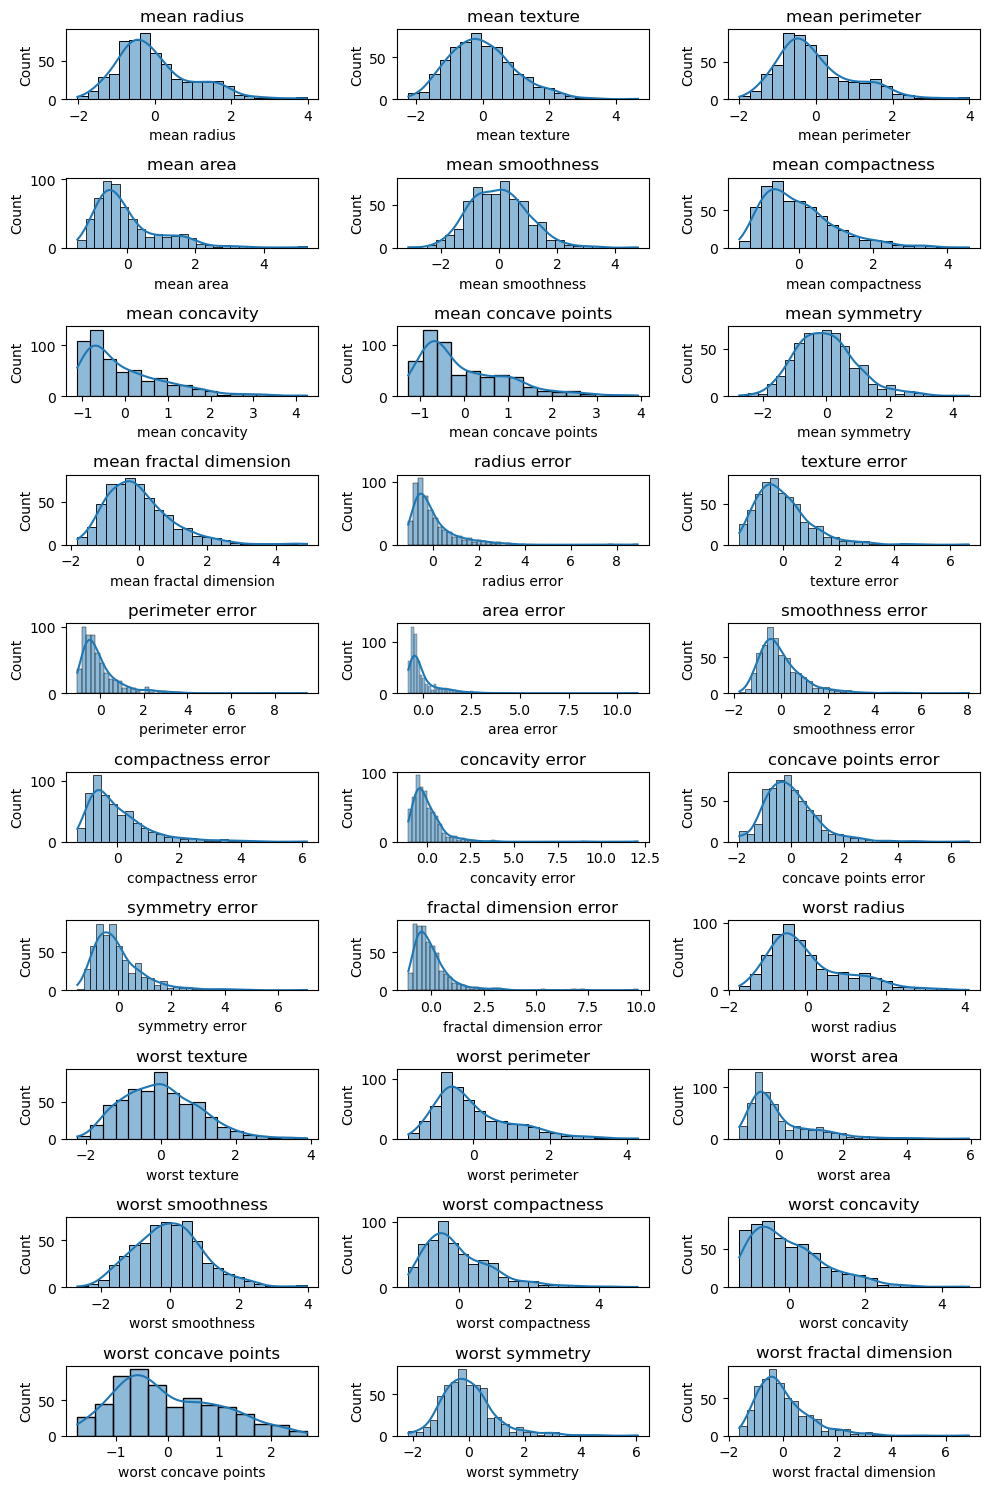

In [12]:
num_features = X.shape[1]
fig, axes = plt.subplots(nrows=int(np.ceil(num_features / 3)), ncols=3, figsize=(10, num_features // 2))

axes = axes.flatten()

for i, column in enumerate(X.columns):
    sns.histplot(X_scaled[column], kde=True, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

## Splitting Dataset Using `train_test_split()` and Checking Which `test_size` is Most Accurate on Unscaled Data*

In [14]:
split_ratios = [0.2, 0.33, 0.5]  
results = []

for test_size in split_ratios:

    X_train, X_test, y_train, y_test = train_test_split(X, df['diagnosis'], test_size=test_size, random_state=42)

    model = LogisticRegression(max_iter=10000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        "Test Size": test_size,
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
    })

results_df = pd.DataFrame(results)

print(results_df)

   Test Size  Accuracy     Confusion Matrix
0       0.20  0.956140   [[39, 4], [1, 70]]
1       0.33  0.968085  [[65, 2], [4, 117]]
2       0.50  0.961404  [[95, 3], [8, 179]]


## Splitting data into training and testing sets
- **`test_size=0.33`** - 67% of the data is used for training, 33% for testing.
- **`random_state=42`** - random seed for reproducibility
- **`stratify=y`** - maintains the class distribution for train and test sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Checking shape and class distribution to make sure splitting worked correctly

In [18]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}\n")

print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}\n")

print(f"y_train class distribution: {y_train.value_counts(normalize=True)}")
print(f"y_test class distribution: {y_test.value_counts(normalize=True)}")

X_train: (381, 30)
X_test: (188, 30)

y_train: (381,)
y_test: (188,)

y_train class distribution: target
0    0.627297
1    0.372703
Name: proportion, dtype: float64
y_test class distribution: target
0    0.62766
1    0.37234
Name: proportion, dtype: float64


# Comparing Raw data and Scaled Data
## Raw Data 

In [20]:
raw_X_train, raw_X_test, raw_y_train, raw_y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
raw_model= LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)

raw_model.fit(raw_X_train, raw_y_train)

raw_y_test_pred = raw_model.predict(raw_X_test)
raw_y_train_pred = raw_model.predict(raw_X_train)

raw_train_accuracy= accuracy_score(raw_y_train, raw_y_train_pred )
raw_test_accuracy = accuracy_score(raw_y_test, raw_y_test_pred)

raw_cm = confusion_matrix(raw_y_test, raw_y_test_pred)
raw_report = classification_report(raw_y_test, raw_y_test_pred, target_names=["Benign (0)", "Malignant (1)"])


print("Unscaled Logistic Regression")
print(f"\tTrain Accuracy: {raw_train_accuracy:.4f}")
print(f"\tTest Accuracy:  {raw_test_accuracy:.4f}")
print("Confusion Matrix For Raw Data :")
print(raw_cm)
print("\t\nClassification Report For Raw Data:")
print(raw_report)

Unscaled Logistic Regression
	Train Accuracy: 0.9554
	Test Accuracy:  0.9415
Confusion Matrix For Raw Data :
[[117   1]
 [ 10  60]]
	
Classification Report For Raw Data:
               precision    recall  f1-score   support

   Benign (0)       0.92      0.99      0.96       118
Malignant (1)       0.98      0.86      0.92        70

     accuracy                           0.94       188
    macro avg       0.95      0.92      0.94       188
 weighted avg       0.94      0.94      0.94       188



## Scaled Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42, stratify=y)
scaled_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)

scaled_model.fit(X_train, y_train)

scaled_y_train_pred = scaled_model.predict(X_train)
scaled_y_test_pred = scaled_model.predict(X_test)

scaled_train_accuracy = accuracy_score(y_train, scaled_y_train_pred)
scaled_test_accuracy = accuracy_score(y_test, scaled_y_test_pred)

scaled_cm = confusion_matrix(y_test, scaled_y_test_pred)
scaled_report = classification_report(y_test, scaled_y_test_pred, target_names=["Benign (0)", "Malignant (1)"])


print("Logistic Regression on Scaled Data")
print(f"\tTrain Accuracy: {scaled_train_accuracy:.4f}")
print(f"\tTest Accuracy:  {scaled_test_accuracy:.4f}")
print("\nConfusion Matrix:")
print(scaled_cm)
print("\nClassification Report:")
print(scaled_report)


Logistic Regression on Scaled Data
	Train Accuracy: 0.9869
	Test Accuracy:  0.9681

Confusion Matrix:
[[117   1]
 [  5  65]]

Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.96      0.99      0.97       118
Malignant (1)       0.98      0.93      0.96        70

     accuracy                           0.97       188
    macro avg       0.97      0.96      0.97       188
 weighted avg       0.97      0.97      0.97       188



# Optimising Logistic Regression Model - Feature Analysis
## Remove L1 regularisation and C parameter

In [24]:
logistic_model = LogisticRegression(solver='liblinear', max_iter=1000)
logistic_model.fit(X_scaled, y)

LogisticRegression(max_iter=1000, solver='liblinear')

## Absolute Value for Logistic Regression

In [26]:
important_features = np.abs(logistic_model.coef_[0])

important_feature_df = pd.DataFrame({'Feature': X_scaled .columns, 'Importance': important_features})
important_feature_df = important_feature_df.sort_values(by='Importance', ascending=False)

print(important_feature_df.head(15))

                    Feature  Importance
21            worst texture    1.313188
10             radius error    1.295274
20             worst radius    1.030488
13               area error    1.029545
23               worst area    1.029155
7       mean concave points    0.968114
27     worst concave points    0.911316
28           worst symmetry    0.883954
26          worst concavity    0.871622
6            mean concavity    0.868519
22          worst perimeter    0.825640
15        compactness error    0.742418
24         worst smoothness    0.671853
19  fractal dimension error    0.671527
12          perimeter error    0.666238


1. `worst texture`
    - variation in tumour texture
    - higher value indicates an irregular tumour/ less uniform texture which is a sign of malignancy

2. `radius error`
    - measures the error when estimating the radius of the tumour
    - higher values suggest irregular growth, may correlate with maligancy

3. `worst radius`
    - largest observed radius of the tumour
    - a larger tumour is more likely to be malignant

4. `area error`
    - measures error in estimating tumour area
    - larger errors can tell us the tumour is a strange/irregular shape - malignant indicator
    
5. `worst area`
    - largest tumour area seen
    - like worst radius, larger tumour areas are usually malignant

## Absolute Coefficient Visualisation

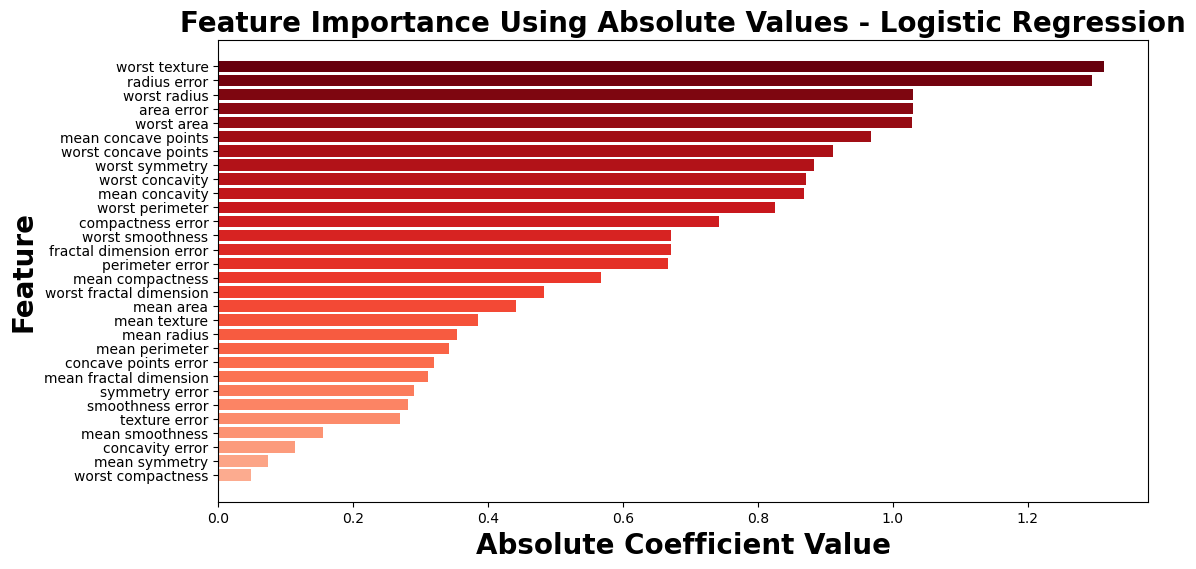

In [29]:
important_features_column = important_feature_df["Feature"]
important_absolute_values = important_feature_df["Importance"]

colors = plt.cm.Reds(np.linspace(1, 0.3, len(important_feature_df)))  

plt.figure(figsize=(12, 6))
plt.barh(important_features_column, important_absolute_values, color=colors)
plt.xlabel("Absolute Coefficient Value", fontsize=20, fontweight='bold')
plt.ylabel("Feature", fontsize=20, fontweight='bold')
plt.title("Feature Importance Using Absolute Values - Logistic Regression", fontsize=20, fontweight='bold')
plt.gca().invert_yaxis()  # Highest importance at the top


plt.savefig("ImportanceFeatures.png", dpi=300, bbox_inches="tight")
plt.show()

# Most and Least Important Features - Visualisation

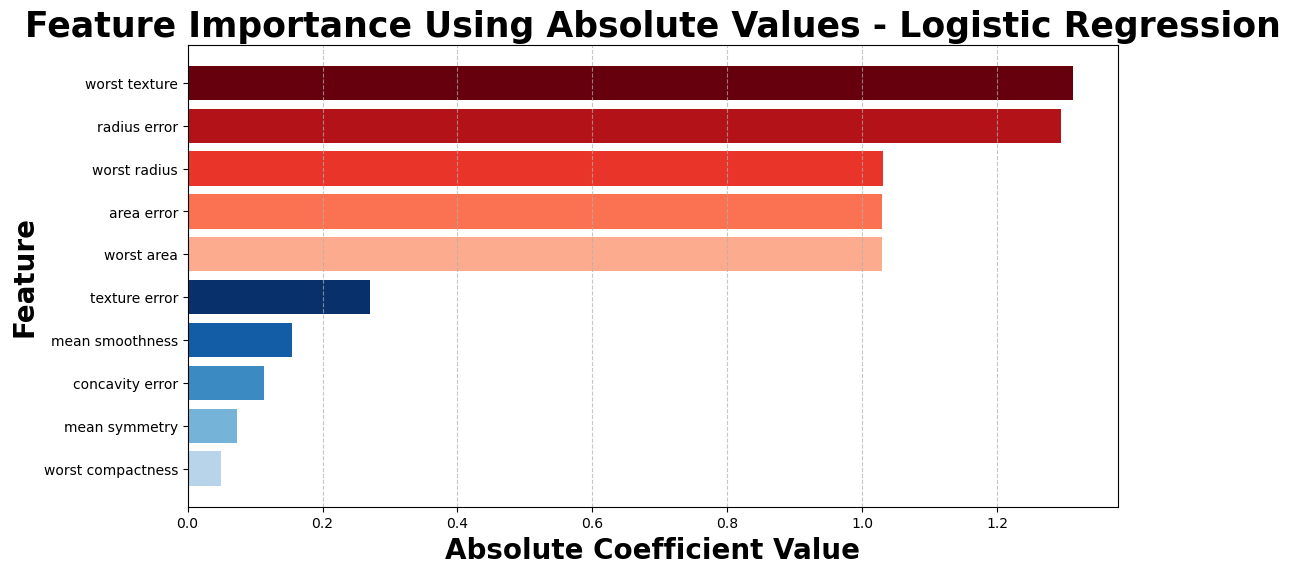

In [31]:
top_5_important_features = important_feature_df.head(5).sort_values(by="Importance", ascending=False)
bottom_5_important_features = important_feature_df.tail(5).sort_values(by="Importance", ascending=False)

comparison_dataframe = pd.concat([top_5_important_features, bottom_5_important_features])

top_colors = plt.cm.Reds(np.linspace(1, 0.3, len(top_5_important_features))) 
bottom_colors = plt.cm.Blues(np.linspace(1, 0.3, len(bottom_5_important_features)))  

colors = np.concatenate([top_colors, bottom_colors])

plt.figure(figsize=(12, 6))
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.barh(comparison_dataframe["Feature"], comparison_dataframe["Importance"], color=colors)
plt.xlabel("Absolute Coefficient Value", fontsize=20, fontweight='bold')
plt.ylabel("Feature", fontsize=20, fontweight='bold')
plt.title("Feature Importance Using Absolute Values - Logistic Regression", fontsize=25, fontweight='bold')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


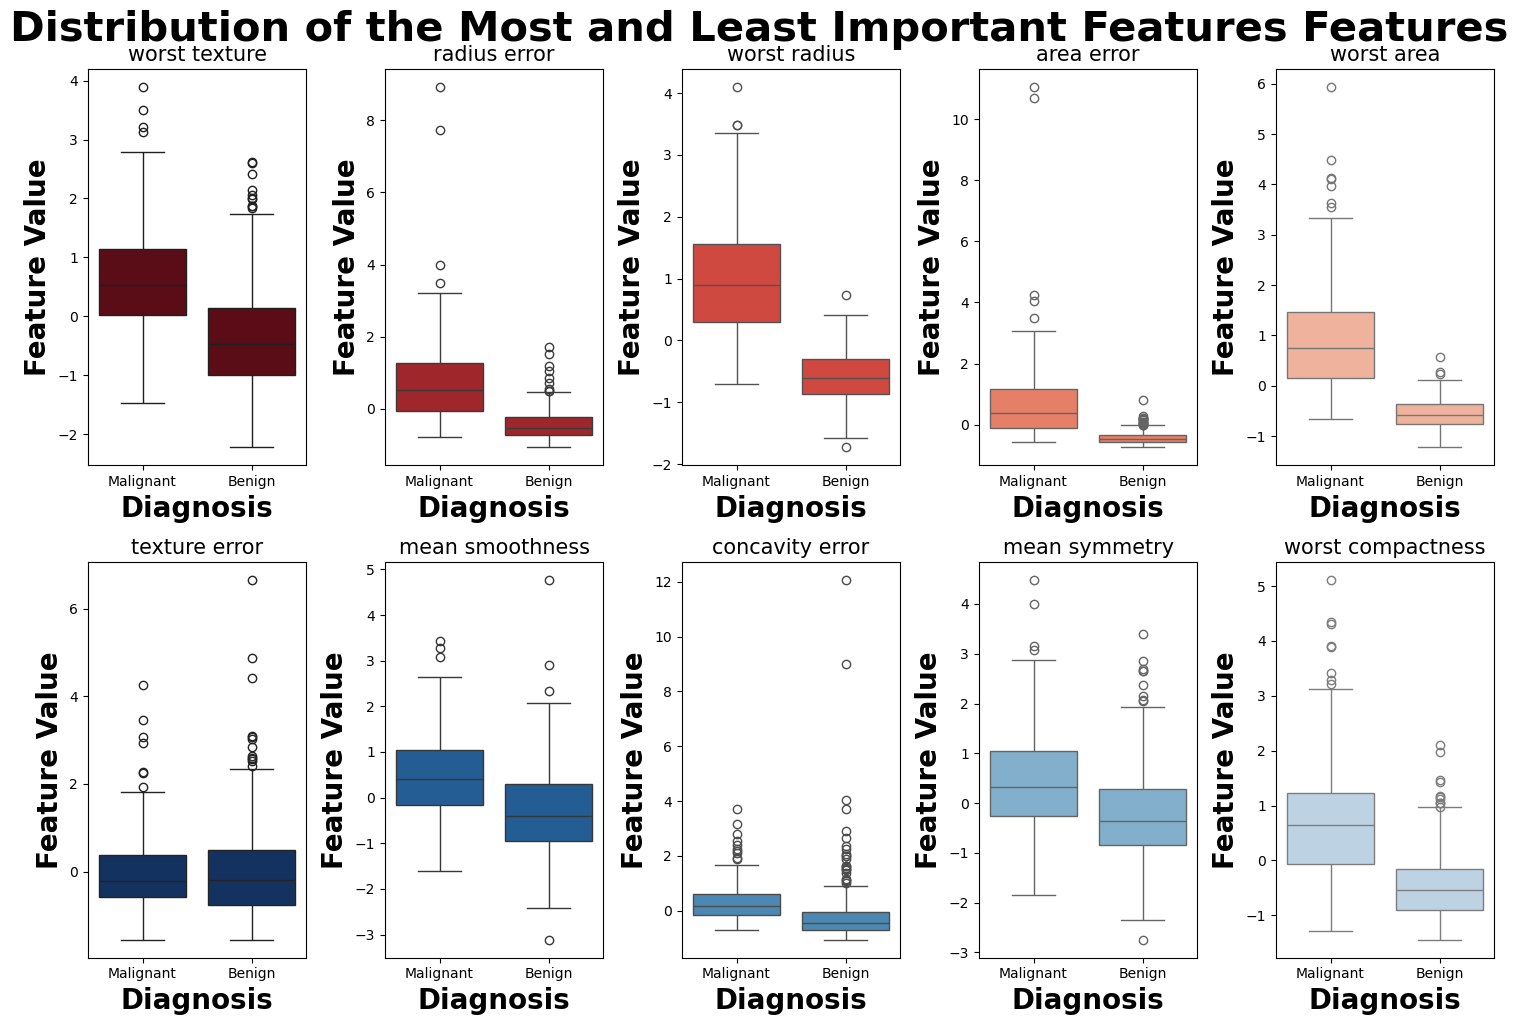

In [84]:
top_features = top_5_important_features["Feature"].tolist() 
bottom_features = bottom_5_important_features["Feature"].tolist() 

# Combine into one list
selected_features = top_features + bottom_features


top_colors = plt.cm.Reds(np.linspace(1, 0.3, len(top_features)))  # Dark red to lighter red
bottom_colors = plt.cm.Blues(np.linspace(1, 0.3, len(bottom_features)))  # Light blue to darker blue
feature_colors = np.concatenate([top_colors, bottom_colors])  # Combine colors

# Map numerical values in `y` to text labels for color mapping
y_labels = y.map({1: "Malignant", 0: "Benign"})  


plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 5, i)  
    
    color_dict = {"Malignant": feature_colors[i - 1], "Benign": feature_colors[i - 1]}
    
    sns.boxplot(x=y_labels, y=X_scaled[feature], hue=y_labels, palette=color_dict)  
    plt.title(feature, fontsize=15, color="black")  
    plt.xlabel("Diagnosis", fontsize=20, fontweight='bold')
    plt.ylabel("Feature Value", fontsize=20, fontweight='bold')

plt.tight_layout()
plt.suptitle("Distribution of the Most and Least Important Features Features", fontsize=30, y=1.02, fontweight='bold')
plt.show()

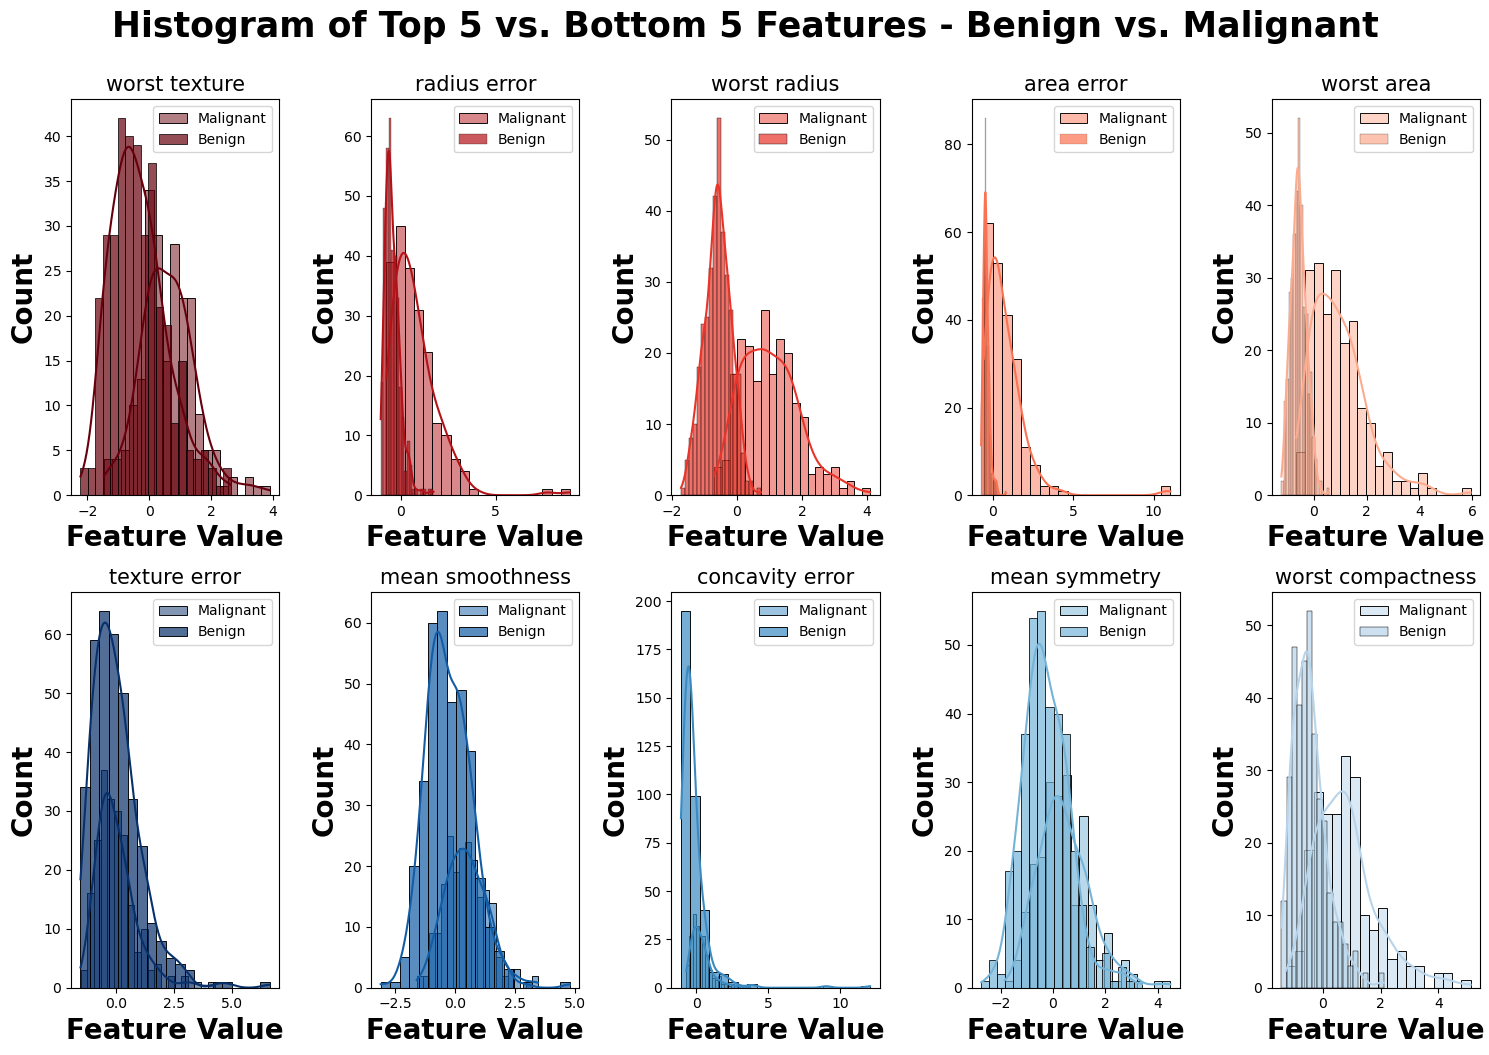

In [33]:
top_features = ['worst texture', 'radius error', 'worst radius', 'area error', 'worst area']  
bottom_features = ['texture error', 'mean smoothness', 'concavity error', 'mean symmetry', 'worst compactness'] 


selected_features = top_features + bottom_features

top_colors = plt.cm.Reds(np.linspace(1, 0.3, len(top_features)))  
bottom_colors = plt.cm.Blues(np.linspace(1, 0.3, len(bottom_features)))  
feature_colors = np.concatenate([top_colors, bottom_colors])  

plt.figure(figsize=(15, 10))
for i, (feature, color) in enumerate(zip(selected_features, feature_colors), 1):
    plt.subplot(2, 5, i)  # Create a grid of subplots
    
    # Malignant (1) in a darker shade of red for top features, lighter blue for bottom features
    sns.histplot(X_scaled[feature][y.to_numpy() == 1], color=color, label="Malignant", kde=True, bins=20)
    
    # Benign (0) in a lighter shade of red for top features, darker blue for bottom features
    sns.histplot(X_scaled[feature][y.to_numpy() == 0], color=color, label="Benign", kde=True, bins=20, alpha=0.7)
    
    plt.title(feature, fontsize=15, color="black")  # Feature title in black
    plt.xlabel("Feature Value", fontsize=20,  fontweight='bold')
    plt.ylabel("Count", fontsize=20,  fontweight='bold')
    plt.legend()

plt.tight_layout()
plt.suptitle("Histogram of Top 5 vs. Bottom 5 Features - Benign vs. Malignant", fontsize=25, y=1.05,fontweight='bold')
plt.savefig("histogram_comparison.png", dpi=400,bbox_inches='tight')
plt.show()

1. **Why is worst texture important even though theres a clear overlap?**
   - still shows a mean shift. Even tho the two distributions overlap, the mean of malignant tumours shifts the the left and the benign distribution shifts to the right. Logistic regression captures these small shifts.
   - Logistic regression also assigns importance by absolute coefficient not just overlaps. Unlike decision tress/SVM's, it does not require completelty distinct distributions.
   - Logistic regressions assings weight/coeffs based on how well it separates class.
   - worst texture still a strong predictor when combines with other features.
   - Log reg assumes all features works together linearly - linear model
   - The model finds a consistent pattern and assigns high importance, even though theres an overlap in distribution.
2. **Why does benign cases appear more**
   - The dataset is imbalanced with over a 100 more benign cases than malignant, hence why the count for benign cases is higher.
3. **Overlapping seen in bottom features**
   - identical value ranges for both cases
   - no clear separation of peaks/spreads
   - no distinct pattern
   - same distribution for both cases
4. **What makes an important feature?**
   - shifted peaks
   - less overlap
   - trends - malignant cases have larger values than benign...

# **Testing accuracy after splitting into training and testing datasets**

In [36]:
def evaluate_and_log_features(num_features, csv_file="logistic_regression_results_2.csv"):
    """
    Evaluates logistic regression with the top 'num_features' and logs results in a CSV file.
    
    Parameters:
    - num_features (int): Number of top features to use.
    """
    # Select the top 'num_features' features
    selected_features = important_feature_df.head(num_features)["Feature"].values
    X_selected = X_scaled[selected_features]  # Use scaled data
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.33, random_state=42)

    # Train the logistic regression model
    logistic_model_selected = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
    logistic_model_selected.fit(X_train, y_train)

    # Compute accuracy scores
    train_accuracy = logistic_model_selected.score(X_train, y_train)
    test_accuracy = logistic_model_selected.score(X_test, y_test)

    # Predict on the test set and compute overall accuracy
    y_pred = logistic_model_selected.predict(X_test)
    overall_accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report & confusion matrix
    class_report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"Results using {num_features} features:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Overall Accuracy: {overall_accuracy:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", conf_matrix)


In [37]:
evaluate_and_log_features(30)
evaluate_and_log_features(25)
evaluate_and_log_features(20)  
evaluate_and_log_features(15)   
evaluate_and_log_features(10)  
evaluate_and_log_features(5)

Results using 30 features:
Training Accuracy: 0.9869
Test Accuracy: 0.9787
Overall Accuracy: 0.9787

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       121
           1       0.96      0.99      0.97        67

    accuracy                           0.98       188
   macro avg       0.97      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188


Confusion Matrix:
 [[118   3]
 [  1  66]]
Results using 25 features:
Training Accuracy: 0.9869
Test Accuracy: 0.9787
Overall Accuracy: 0.9787

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       121
           1       0.96      0.99      0.97        67

    accuracy                           0.98       188
   macro avg       0.97      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188


Confusion Matrix:
 [[118   3]
 [  1  66]]
Results us

# Most Optimal Logistic Regression Model With 15 Features

In [77]:
selected_features = important_feature_df.head(15)["Feature"].values
X_selected = X_scaled[selected_features]  # Use scaled data

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.33, random_state=42)

logistic_model_selected = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
logistic_model_selected.fit(X_train, y_train)

train_accuracy = logistic_model_selected.score(X_train, y_train)
test_accuracy = logistic_model_selected.score(X_test, y_test)

y_pred = logistic_model_selected.predict(X_test)
overall_accuracy = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

    # Print results
print(f"Results using {15} features:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", conf_matrix)



Results using 15 features:
Training Accuracy: 0.9816
Test Accuracy: 0.9787
Overall Accuracy: 0.9787

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       121
           1       0.96      0.99      0.97        67

    accuracy                           0.98       188
   macro avg       0.97      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188


Confusion Matrix:
 [[118   3]
 [  1  66]]


# Key Observations:

-True Negatives (TN = 118): The model correctly classified 118 benign cases.

-False Positives (FP = 3): 3 benign case was incorrectly predicted as malignant.

-False Negatives (FN = 1): 1 malignant cases were misclassified as benign, which is more concerning in medical applications.

-True Positives (TP = 66): The model correctly identified 41 malignant cases.

# Performance Metrics:

- Accuracy = (TP + TN) / (TP + TN + FP + FN) 

- Precision (for malignant cases) = TP / (TP + FP) 

- Recall (Sensitivity, for malignant cases) = TP / (TP + FN)  

# Interpretation:

-The model has a high accuracy of 97.87%, meaning it correctly classifies most cases.


# ROC AUC Curve for Optimised Logistic Regression Model (15 Features)

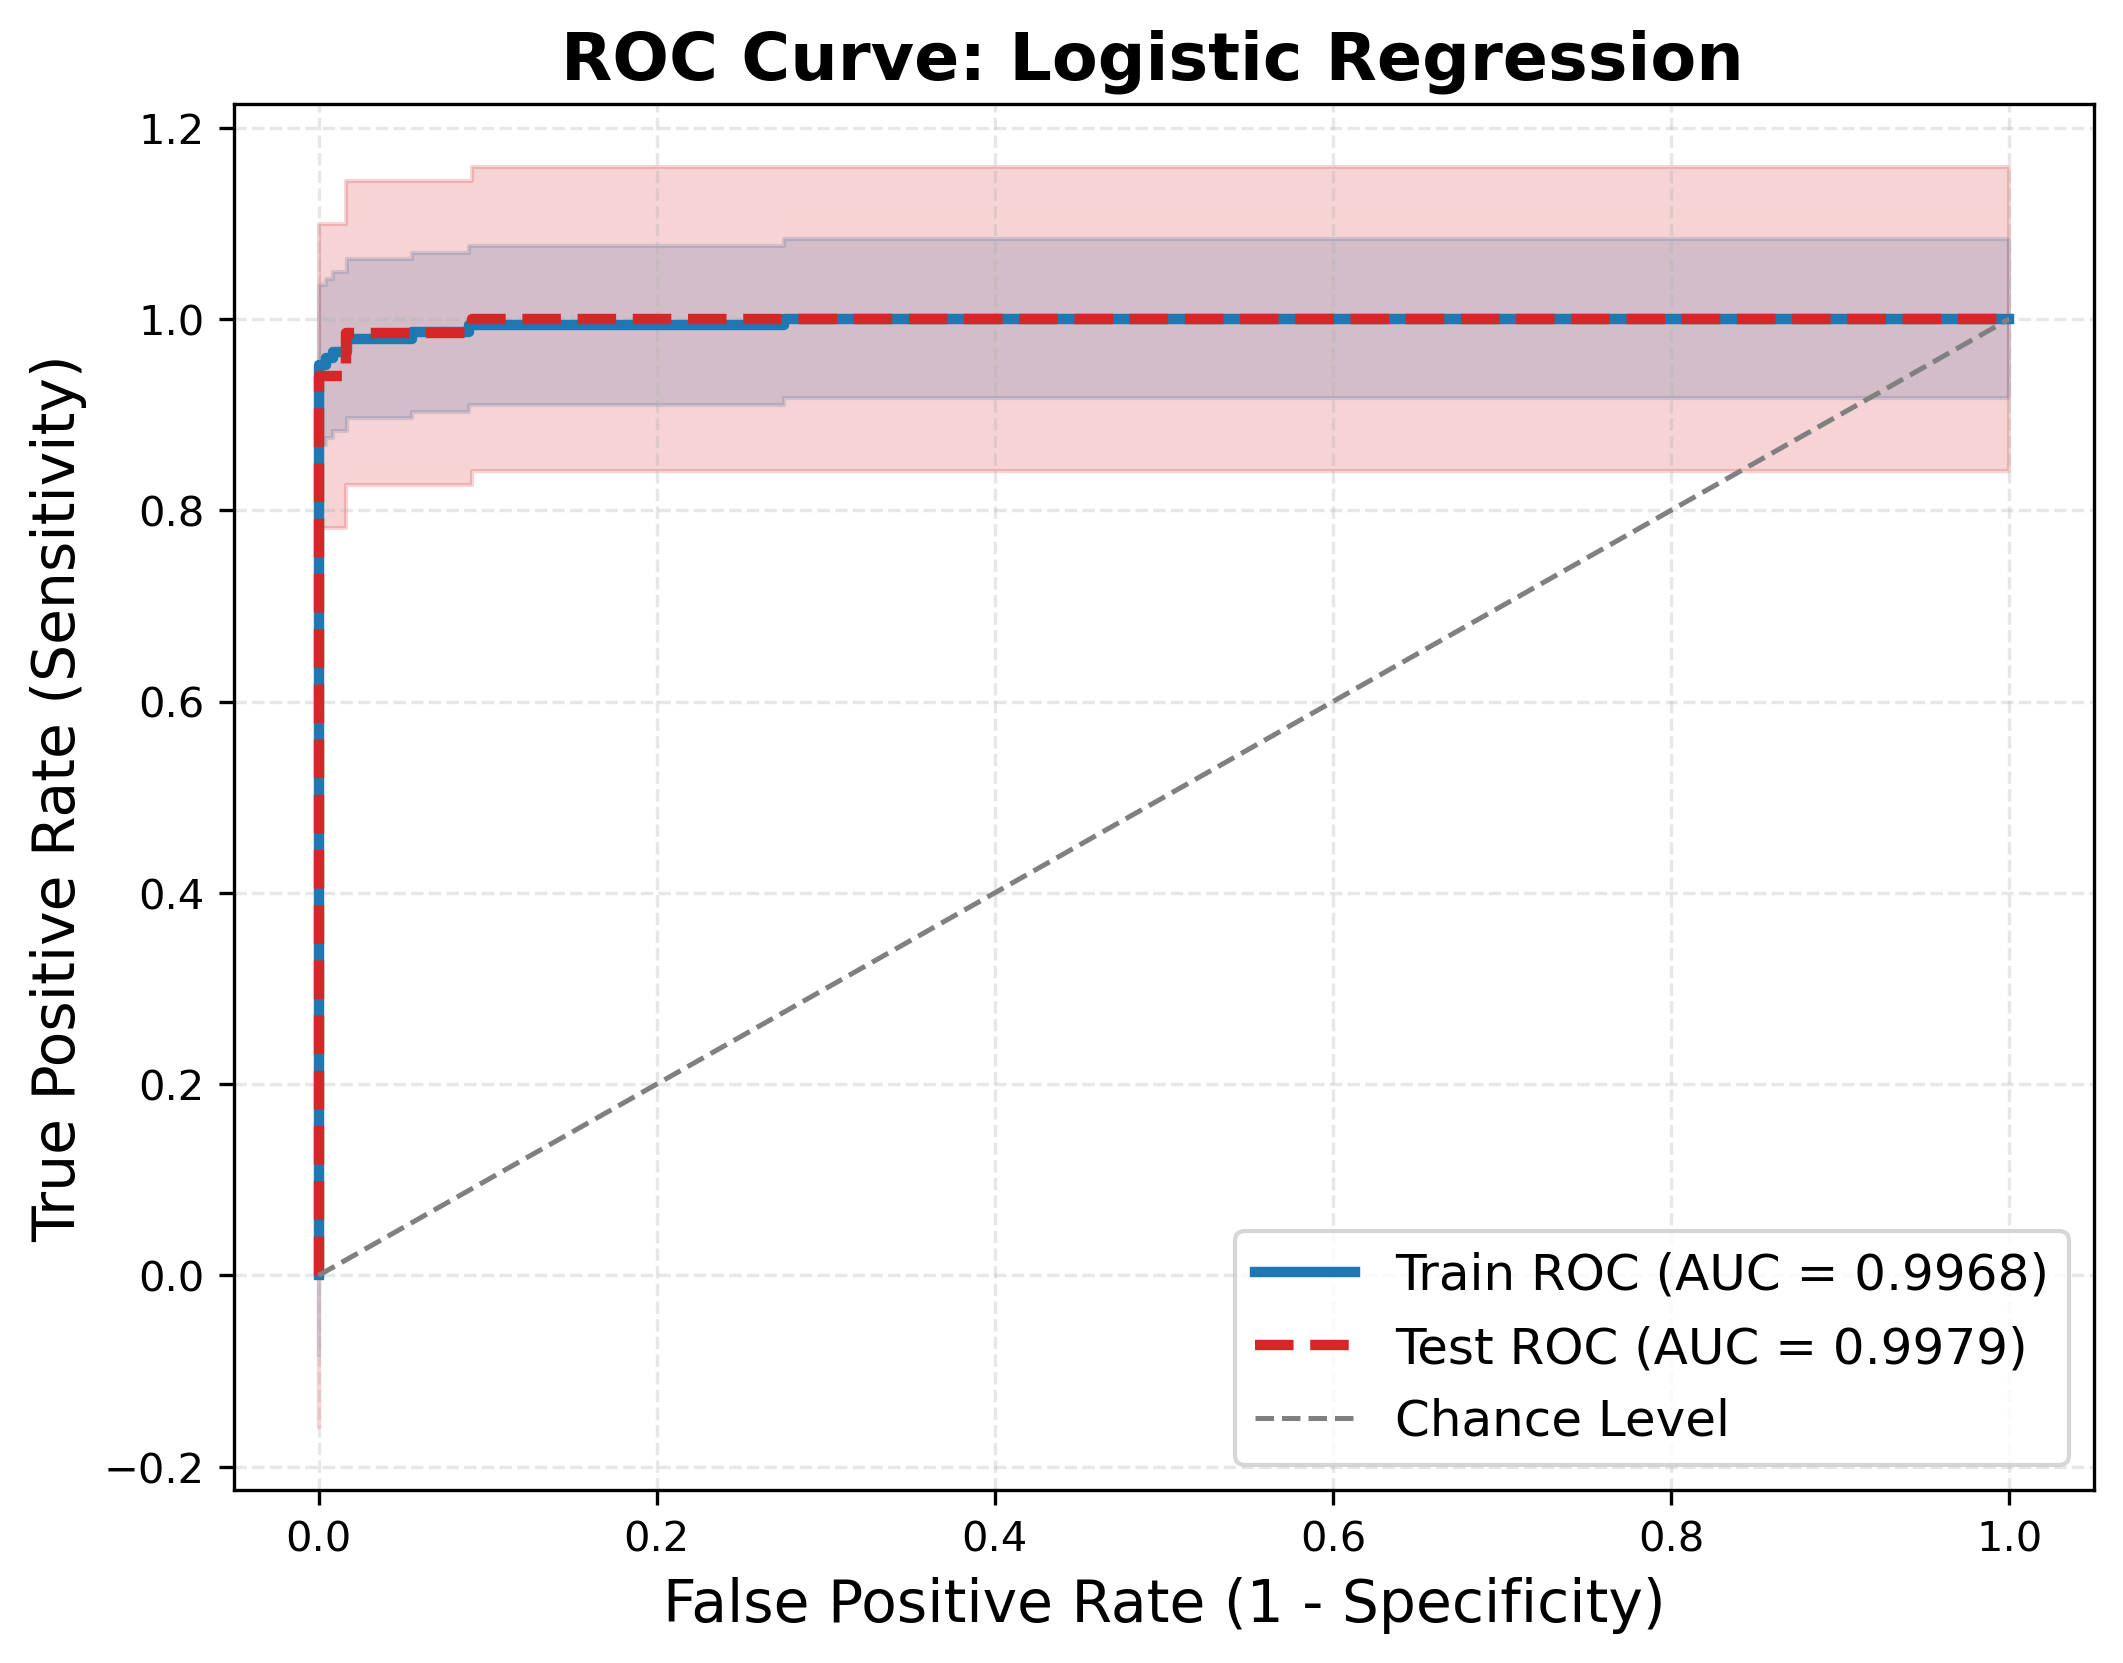

In [81]:
best_15_features = important_feature_df.head(15)["Feature"].values  # Get top 15 features

X_train_15 = X_train[best_15_features]
X_test_15 = X_test[best_15_features]

y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

logistic_model_15 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
logistic_model_15.fit(X_train_15, y_train_np)

y_train_prob_15 = logistic_model_15.predict_proba(X_train_15)[:, 1]
y_test_prob_15 = logistic_model_15.predict_proba(X_test_15)[:, 1]

fpr_train_15, tpr_train_15, _ = roc_curve(y_train_np, y_train_prob_15)
roc_auc_train_15 = auc(fpr_train_15, tpr_train_15)

fpr_test_15, tpr_test_15, _ = roc_curve(y_test_np, y_test_prob_15)
roc_auc_test_15 = auc(fpr_test_15, tpr_test_15)

plt.figure(figsize=(8, 6), dpi=300)
plt.plot(fpr_train_15, tpr_train_15, color="#1f77b4", lw=2.5, label=f"Train ROC (AUC = {roc_auc_train_15:.4f})")
plt.plot(fpr_test_15, tpr_test_15, color="#d62728", lw=2.5, linestyle="--", label=f"Test ROC (AUC = {roc_auc_test_15:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", linewidth=1.2, label="Chance Level")

# Confidence Intervals
n_bootstraps = 1000
rng_seed = 42
rng = np.random.RandomState(rng_seed)

bootstrapped_train_auc_15 = []
bootstrapped_test_auc_15 = []

for i in range(n_bootstraps):
    indices = rng.randint(0, len(y_train_np), len(y_train_np))  
    if len(np.unique(y_train_np[indices])) < 2:
        continue
    fpr, tpr, _ = roc_curve(y_train_np[indices], y_train_prob_15[indices])
    bootstrapped_train_auc_15.append(auc(fpr, tpr))

    indices = rng.randint(0, len(y_test_np), len(y_test_np))  
    if len(np.unique(y_test_np[indices])) < 2:
        continue
    fpr, tpr, _ = roc_curve(y_test_np[indices], y_test_prob_15[indices])
    bootstrapped_test_auc_15.append(auc(fpr, tpr))

train_auc_ci_15 = (np.percentile(bootstrapped_train_auc_15, 2.5), np.percentile(bootstrapped_train_auc_15, 97.5))
test_auc_ci_15 = (np.percentile(bootstrapped_test_auc_15, 2.5), np.percentile(bootstrapped_test_auc_15, 97.5))

plt.fill_between(fpr_train_15, tpr_train_15 - sem(tpr_train_15), tpr_train_15 + sem(tpr_train_15), color="#1f77b4", alpha=0.2)
plt.fill_between(fpr_test_15, tpr_test_15 - sem(tpr_test_15), tpr_test_15 + sem(tpr_test_15), color="#d62728", alpha=0.2)


plt.xlabel("False Positive Rate (1 - Specificity)", fontsize=14)
plt.ylabel("True Positive Rate (Sensitivity)", fontsize=14)
plt.title("ROC Curve: Logistic Regression ", fontsize=16, fontweight="bold")
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3, linestyle="--")
plt.show()


### ROC Curve for Logistic Regression Using Top 15 Features

The ROC (Receiver Operating Characteristic) curve visualizes the trade-off between sensitivity (true positive rate) and specificity (1 - false positive rate) across different classification thresholds.

- The curve plots the true positive rate against the false positive rate.
- The closer the curve follows the left-hand border and then the top border of the plot, the more accurate the model.
- The AUC (Area Under the Curve) summarizes this performance. A value close to 1.0 indicates excellent discrimination between classes.